# Scenario:

You are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

# Your Objective:
Help the organiaztion to learn more about the penguins using the dataset and a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

Furthermore, you are trying to confirm if penguins of the `same species` exhibit different physical characteristics based on `sex`. This doesn't include location.

# Data Dictionary:
The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex.

<img src = 'penguins_data_dict.png' width = 700 height = 700 align = 'center'>

# Phases:
- Phase 1: Imports
- Phase 2: EDA
- Phase 3: Modelling
- Phase 4: Evaluate the metrics
    - Inertia 
    - Silhouette score
- Phase 5: Decide optimal K-value
- Phase 6: Verification of results
- Phase 7: Technical and Non technical Stakeholder summaries

## Phase 1: Imports

In [1]:
# Standard operational packages
import pandas as pd
import numpy as np

# For modelling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# For viusalizations
import seaborn as sns

In [2]:
# Reading the file:
penguins = pd.read_csv('penguins.csv')
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**Observation**:
We could encode `species, island and sex` features.

## Phase 2: EDA

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Observation**:
There are a few missing values

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Observation**:
The values have different magnitude. It would be benficial to Scale them.

In [5]:
# Number of penguin species
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Observation**:
There are three species of penguins; forming three clusters would be a feasible option. Also, we can encode them.

For purposes of clustering, pretend you don't know that there are three different types of species. Then, we can explore whether the algorithm can discover the different species. We might even find other relationships in the data.

In [6]:
# Number of islands:
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

**Observation**:
There are three islands for penguins; forming three clusters would be a feasible option. Also, we can encode them.

For purposes of clustering, pretend you don't know that there are three different types of islands. Then, we can explore whether the algorithm can discover the different species. We might even find other relationships in the data.

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data.

### Checking for missing values:

In [7]:
pd.DataFrame(penguins.isnull().sum(), columns = ['Nulls'])

,Nulls
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


**Observation**:
Since the null values are miniscule we can drop them

In [8]:
# Dropping the missing values
penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)

In [9]:
# Check for missing values
penguins_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS. 


In [10]:
# Converting values in 'sex' column
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [11]:
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])

penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,0
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,1
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,0
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,1
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,1


### Drop a column

Drop the categorical column `island` from the dataset. While it has value, we are trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later. 

In [12]:
penguins_subset = penguins_subset.drop(['island'], axis = 1)

penguins_subset.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
5,Adelie,38.9,17.8,181.0,3625.0,0
6,Adelie,39.2,19.6,195.0,4675.0,1
7,Adelie,41.1,17.6,182.0,3200.0,0
8,Adelie,38.6,21.2,191.0,3800.0,1
9,Adelie,34.6,21.1,198.0,4400.0,1


### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 

First, copying all the features except the `'species'` column to a DataFrame `X`. 

In [13]:
X = penguins_subset.drop(['species'], axis = 1)
X.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
5,38.9,17.8,181.0,3625.0,0
6,39.2,19.6,195.0,4675.0,1
7,41.1,17.6,182.0,3200.0,0
8,38.6,21.2,191.0,3800.0,1
9,34.6,21.1,198.0,4400.0,1


Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [14]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 , -1.00904996],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927,  0.99103121],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466, -1.00904996],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906,  0.99103121]])

## Phase 3: Data modeling

- Instantiate Model
- Fit the data
- Evaluate Inertia then plot Elbow grpah
- Evaluate Sillouettte Score 


Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [18]:
# Instantiate the model
kmeans3 = KMeans(n_clusters=3, random_state=42)

In [19]:
# Fit the data
kmeans3.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
# Evaluating the Inertia
print('Clusters:', kmeans3.labels_)
print('Inertia:', kmeans3.inertia_)

Clusters: [2 0 0 0 2 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 0 2 0 2 2 0 0 2 0 2
 0 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 2 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2
 2 0 2 0 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0
 2 2 0 2 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Inertia: 578.8284278107235


The `.labels_` attribute returns a list of values that is the same length as the training data. Each `value corresponds to the number of the cluster to which that point is assigned`. Since our K-means model clustered the data into three clusters, the value assigned to each observation will be 0, 1, or 2. (Note that the cluster number itself is arbitrary, and serves only as a label.)  
<br/>

The `.inertia_` attribute returns the sum of the squared distances of samples from their closest cluster center.


## Phase 4: Evaluate Inertia and Silhouette Score

### Phase 4A: Evaluate inertia

This inertia value isn't helpful by itself. We need to compare the inertias of multiple _k_ values. To do this, we'll create a function that fits a K-means model for multiple values of _k_, calculates the inertia for each _k_ value, and appends it to a list.

In [29]:
# Evaluating Inertia:

num_of_clusters = [i for i in range(2,11)]
print("Number of Clusters:", num_of_clusters)

# Function for Inertia calcualted for different cluster values
def kmeans_inertia(num_clusters, X_values):
    """
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.
    
    Args:
    num_clusters: (list of ints)  - The different k values to try
    x_vals:       (array)         - The training data(X_scaled)
    
    Returns: 
    inertia:      (list)          - A list of inertia scores, one for each value of k
    
    """
    inertia = []
    
    for k in num_of_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_values)
        inertia.append(kmeans.inertia_)
    
    return inertia


# Calling our function:
print('\nInertia values for our cluster list:', num_of_clusters)
inertia = kmeans_inertia(num_of_clusters, X_scaled)
inertia

Number of Clusters: [2, 3, 4, 5, 6, 7, 8, 9, 10]

Inertia values for our cluster list: [2, 3, 4, 5, 6, 7, 8, 9, 10]


[885.6224143652249,
 578.8284278107235,
 386.1453442477329,
 284.5464837898288,
 217.92858573807678,
 201.39287843423264,
 185.461310432323,
 173.4545211497985,
 164.12001520260708]

### Elbow plot:

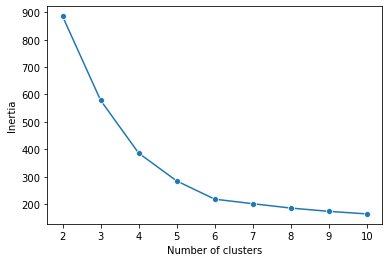

In [32]:
plt = sns.lineplot(x = num_of_clusters, y = inertia, marker = 'o')
plt.set_xlabel("Number of clusters");
plt.set_ylabel("Inertia");

**Observation**<br>
The plot seems to depict an elbow at **`six`** clusters, but there isn't a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked. 

### Phase 4B: Evaluate silhouette score

Unlike inertia, silhouette score doesn't have its own attribute that can be called on the model object. To get a silhouette score, we have to use the `silhouette_score()` function that we imported from `sklearn.metrics`. 

You must pass to it two required parameters: 
* your training data and 
* their assigned cluster labels.

Let's see what this looks like for the `kmeans3` model we created earlier.

In [33]:
sil_score = silhouette_score(X = X_scaled, labels=kmeans3.labels_)
sil_score

0.45101024097188375

This number in itself does not really indicate anything plotting the num of cluster with the X_scaled values along with their silhoutte scores would be insightful.<br>
    For this we will define a function that takes in `num_clusters` and `X_values` and returns a list of `sil_scores` for every values of k in `num_of_clusters` list.

In [40]:
# List of k cluster values 
num_of_clusters = [i for i in range(2,11)]

# Function for calculating silhoutte scores for every value of k in the list above:
def kmeans_silhouette(num_clusters, X_values):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    
    sil_scores = []
    
    for k in num_of_clusters:
        kmeans = KMeans(n_clusters= k, random_state=42)
        kmeans.fit(X_values)
        sil_scores.append(silhouette_score(X = X_values, labels=kmeans.labels_))
    
    return sil_scores

# Calling our function:
sil_score  = kmeans_silhouette(num_of_clusters, X_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188375,
 0.5080140996630784,
 0.5199985748608681,
 0.5263224884981607,
 0.47774022332151733,
 0.42219207326432245,
 0.36062890821417276,
 0.36172505634200175]

Text(0, 0.5, 'Silhouette Score')

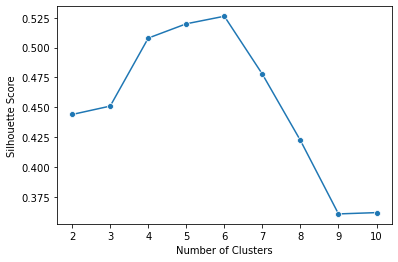

In [42]:
# Plot for silhoutte scores against clusters
plot = sns.lineplot(x = num_of_clusters, y = sil_score, marker = 'o')
plot.set_xlabel("Number of Clusters")
plot.set_ylabel("Silhouette Score")

**Observation**:<br>
Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters. 

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although five clusters also yield a relatively good silhouette score.

## Phase 5: Deciding Optimal K Value

In [48]:
# Kmeans with 6 clusters
kmeans6 = KMeans(n_clusters=6, random_state=42)
# Fitting our model
kmeans6.fit(X_scaled)

print(kmeans6)

# Unique labels for fitted model
print('Unique labels:', np.unique(kmeans6.labels_))
print('Clusters:', kmeans6.labels_)

KMeans(n_clusters=6, random_state=42)
Unique labels: [0 1 2 3 4 5]
Clusters: [2 1 1 1 2 1 2 1 2 2 1 1 2 1 3 1 2 1 2 2 1 2 1 1 2 1 2 1 2 1 2 2 1 1 2 1 2
 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2
 1 2 1 2 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 1 2 5 3
 3 5 3 5 5 3 5 3 5 3 5 3 5 3 3 5 5 3 1 3 1 3 5 3 5 3 5 3 1 3 1 3 3 5 5 3 5
 3 3 5 3 5 5 3 5 3 3 5 5 3 5 3 1 3 5 3 3 5 3 5 5 3 5 3 3 5 0 4 0 4 4 0 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 4 0 0 4 0 4 4 0 4 4 0 0 4 0 4 0 4 0 4 0 4 0 4 4 0
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 4 0 4 0 4 4 0 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 4 0 0 4 0 4 0 4 4 0 4 0 4 0 4 0 4 0 4 4 0 0 4 0 4]


## Phase 6: Verification of Clusters

Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [51]:
# Create a new column `cluster`.
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,2
1,Adelie,39.5,17.4,186.0,3800.0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,1,2


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [52]:
penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Gentoo       58
1        Adelie       73
         Chinstrap     5
2        Adelie       71
3        Adelie        2
         Chinstrap    34
4        Gentoo       61
5        Chinstrap    29
dtype: int64

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

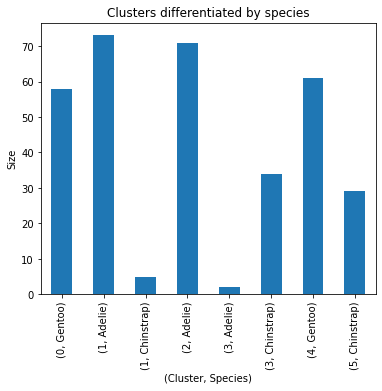

In [53]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [55]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.
penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
1        Adelie     0           73
2        Adelie     1           71
4        Gentoo     1           61
0        Gentoo     0           58
3        Chinstrap  1           34
5        Chinstrap  0           29
1        Chinstrap  0            5
3        Adelie     1            2
dtype: int64

**Observation**:<br>
Even though clusters 1 and 3 weren't all one species or sex, the `groupby` indicates that the algorithm produced clusters mostly differentiated by species and sex. 

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

<Figure size 720x720 with 0 Axes>

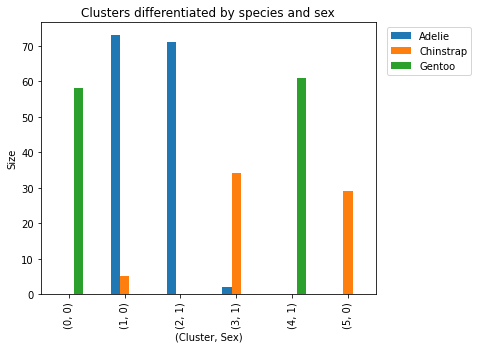

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

# Phase 7: Technical and Non-techincal Stakeholder summaries

## Technical StakeHolder Summary:

-   The clusters in this project are mostly differentiated by species and sex as shown by the groupby results and corresponding graphs. 
-   The elbow plot and especially the silhouette scores suggests that 6 clusters are optimal for this data.
-   Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).

## Non-technical Stakeholder summary:

*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.